#### OBJECTIVES
- Use a football api to get English Premier league data for the season 2024/2025
- Calculate win probabilities of the teams
- Binomial probability of the teams winning the same number of games 

In [2]:
import requests 
import pandas as pd 
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://api.football-data.org/v4/competitions/PL/standings"
headers = {"X-Auth-Token": "b4dbffaa9a7d4cf3986d0cc1aa1c389f"}
params = {"season": 2024}

response = requests.get(url, headers = headers, params = params)
data = response.json()

#view all the json data 
#data 

In [4]:
# get specifics from the data - total standings and data in 'table'
standings_data = data['standings'][0]['table']
#standings_data to view the extracted specifics

#turning standings_data into a data frame using list comprehension
standings_df = pd.DataFrame([{
    'Position': team['position'],
    'Team': team['team']['name'],
    'Played': team['playedGames'],
    'Won': team['won'],
    'Drawn': team['draw'],
    'Lost': team['lost'],
    'Goals For': team['goalsFor'],
    'Goals Against': team['goalsAgainst'],
    'Points': team['points']
} for team in standings_data])

In [5]:
# FUNCTION TO CALCULATE THE WIN, DRAW AND LOSS RATE DURING THE SEASON AND THE BINOMIAL PROBABILITY OF WINNING THE SAME NO OF GAMES

def win_probability(df):
    # The rate at which the teams won during the season
    df['win_rate'] = df['Won']/df['Played']

    # Draw probability during the season
    df['draw_rate'] = df['Drawn']/df['Played']

    # Loss probability during the season
    df['loss_rate'] = df['Lost']/df['Played']

    # BINOMIAL PROBABILITIES
    n = df['Played']
    k = df['Won']
    p = df['win_rate']

    df['win'] = stats.binom.pmf(k, n, p)
    return df

In [6]:
win_probability1= win_probability(standings_df)
win_probability1

,Position,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Points,win_rate,draw_rate,loss_rate,win
0,1,Liverpool FC,38,25,9,4,86,41,84,0.657895,0.236842,0.105263,0.135388
1,2,Arsenal FC,38,20,14,4,69,34,74,0.526316,0.368421,0.105263,0.128761
2,3,Manchester City FC,38,21,8,9,72,44,71,0.552632,0.210526,0.236842,0.129291
3,4,Chelsea FC,38,20,9,9,64,43,69,0.526316,0.236842,0.236842,0.128761
4,5,Newcastle United FC,38,20,6,12,68,47,66,0.526316,0.157895,0.315789,0.128761
5,6,Aston Villa FC,38,19,9,10,58,51,66,0.500000,0.236842,0.263158,0.128585
6,7,Nottingham Forest FC,38,19,8,11,58,46,65,0.500000,0.210526,0.289474,0.128585
7,8,Brighton & Hove Albion FC,38,16,13,9,66,59,61,0.421053,0.342105,0.236842,0.130190
8,9,AFC Bournemouth,38,15,11,12,58,46,56,0.394737,0.289474,0.315789,0.131480
9,10,Brentford FC,38,16,8,14,66,57,56,0.421053,0.210526,0.368421,0.130190


[Text(0, 0.5, 'Teams'), Text(0.5, 0, 'Probability')]

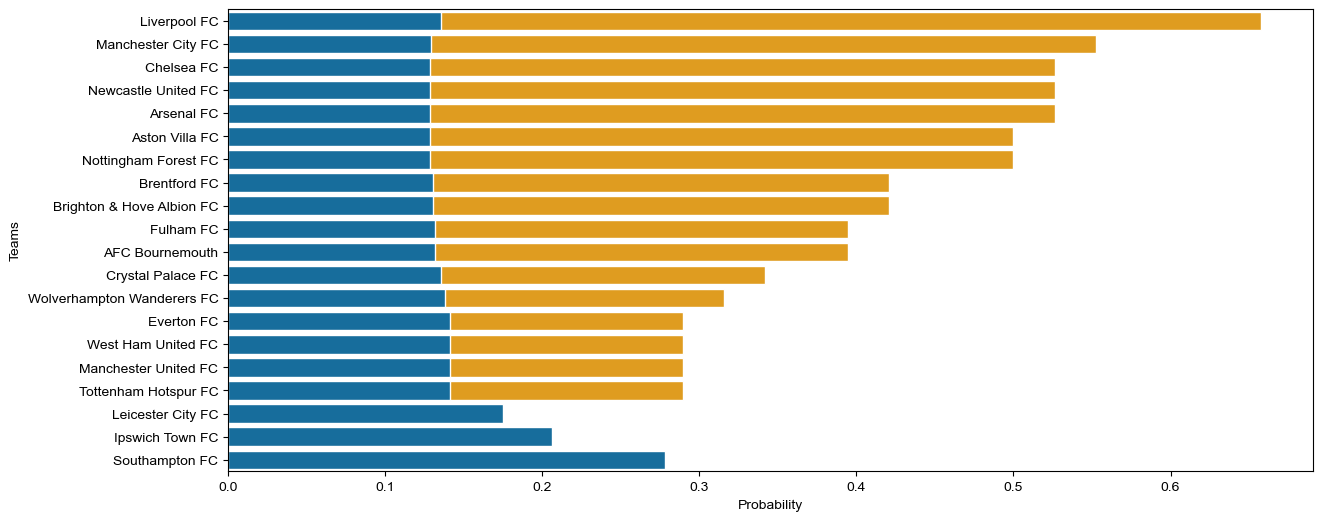

In [7]:
#Visialization of the win probability and the binomial probability of winning the same amount of games 
f,ax = plt.subplots(figsize = (14,6))
sns.set_theme(style='whitegrid')

df_sort = standings_df.sort_values('win_rate', ascending = False)

# THE WIN RATE PROBABILITY OF THE SEASON
sns.set_color_codes('pastel')
sns.barplot(x = df_sort['win_rate'], y = df_sort['Team'], color = 'orange')

# BINOMIAL WIN PROBABILITY
sns.set_color_codes('colorblind')
sns.barplot(x= df_sort['win'], y=df_sort['Team'], color='b')

ax.set(ylabel="Teams", xlabel="Probability")